In [1]:
from olfactorybulb.database import *
import os,sys
from neuronunit.tests.olfactory_bulb.publications import *
from neuronunit.tests.olfactory_bulb.tests import *
from neuronunit.models.neuron_cell import NeuronCellModel
from sciunit.suites import TestSuite
from pandas import DataFrame
import quantities as pq
from neuronunit.tests.olfactory_bulb.utilities import cache
from linetimer import CodeTimer
import string

/home/justas/anaconda2/envs/p27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Could not load NEURONBackend


In [2]:
cell_type = 'mc'

# Load tests
measurements = Measurement\
    .select(Measurement)\
    .join(Property)\
    .switch(Measurement)\
    .join(Source)\
    .where((Measurement.property.type == "Electrophysiology") & (Measurement.property.id.startswith(cell_type+'_')))\
    .order_by(Measurement.property.id)

tests = []

for m in measurements:
    t = str(m.property.test_class_generic)
    pub = str(m.source.publication_class).strip()
    class_name = t+pub
    
    globals()[class_name] = type(class_name, 
                                 (eval(pub), eval(t)), 
                                 {})
    
    print('creating specific test class: ' + class_name)
    
    tests.append(eval(class_name)(observation={"mean": m.mean * eval(m.property.units), "std": m.std * eval(m.property.units), "n": m.n}))
    
    
# Load model classes
model_classes = list(CellModel\
                    .select(CellModel)\
                    .where(CellModel.cell_type == cell_type.upper())             
                     )
for i, m in enumerate(model_classes):
    nmsp = string.join(m.isolated_model_class.split('.')[:-1],'.')
    cls = m.isolated_model_class.split('.')[-1]

    import_cmd = 'from '+nmsp+' import '+cls+' as Model'+str(i)
    print(import_cmd)
    exec(import_cmd)
    
# Create work item list
work_items = []

for model in model_classes:
    work_items.append({"model_class": model.isolated_model_class })
        
def dowork(item):
    results = []
    
    import prev_ob_models
    exec('cell = '+ str(item["model_class"]) +'()')

    model = NeuronCellModel(cell.soma(0.5),name=cell.__class__.__module__+'.'+cell.__class__.__name__)


    for test in tests:
        try:
            print('Starting', item, test)
            result = test.generate_prediction(model)
            print('Finished', item, test, result)

        except:
            import traceback
            result = traceback.format_exc()
            print(result)

        results.append(result)

    return item["model_class"], results


creating specific test class: AfterHyperpolarizationAmplitudeTestYu2015
creating specific test class: AfterHyperpolarizationAmplitudeTestBurtonUrban2014
creating specific test class: AfterHyperpolarizationTimeTestYu2015
creating specific test class: AfterHyperpolarizationTimeTestBurtonUrban2014
creating specific test class: SpikeAmplitudeTestYu2015
creating specific test class: SpikeAmplitudeTestBurtonUrban2014
creating specific test class: SpikeHalfWidthTestYu2015
creating specific test class: SpikeHalfWidthTestBurtonUrban2014
creating specific test class: SpikePeakTestYu2015
creating specific test class: SpikeThresholdTestYu2015
creating specific test class: SpikeThresholdTestBurtonUrban2014
creating specific test class: CellCapacitanceTestYu2015
creating specific test class: CellCapacitanceTestBurtonUrban2014
creating specific test class: FISlopeTestBurtonUrban2014
creating specific test class: InputResistanceTestYu2015
creating specific test class: InputResistanceTestBurtonUrban201

('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.AfterHyperpolarizationAmplitudeTestYu2015 object at 0x7fd7dd147550>)


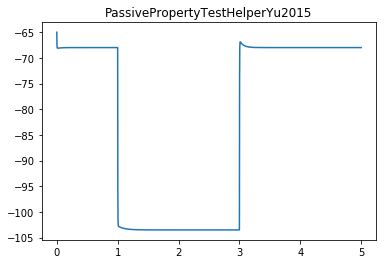

Code block 'PassivePropertyTestHelperYu2015' took: 8649.55997467 ms


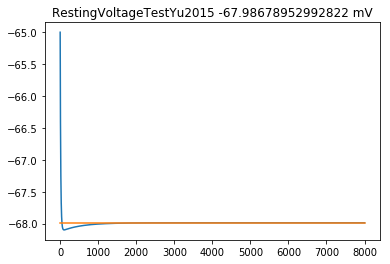

Code block 'RestingVoltageTestYu2015' took: 9053.63202095 ms


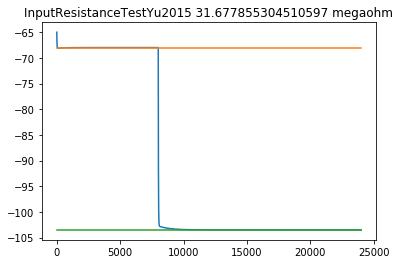

Code block 'InputResistanceTestYu2015' took: 369.342088699 ms


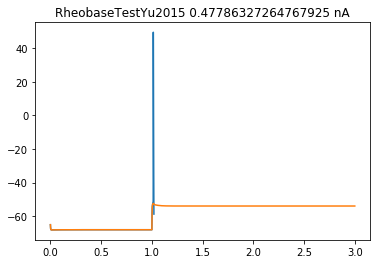

Code block 'RheobaseTestYu2015' took: 37195.2009201 ms


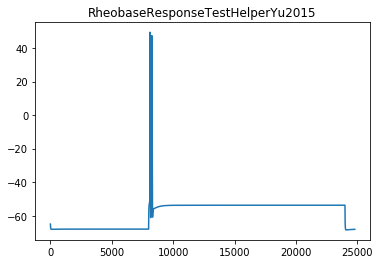

Code block 'RheobaseResponseTestHelperYu2015' took: 40872.8559017 ms


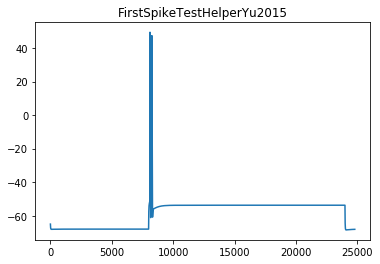

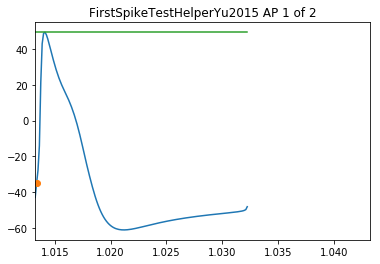

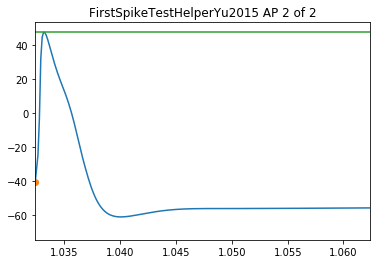

Code block 'FirstSpikeTestHelperYu2015' took: 42015.8190727 ms


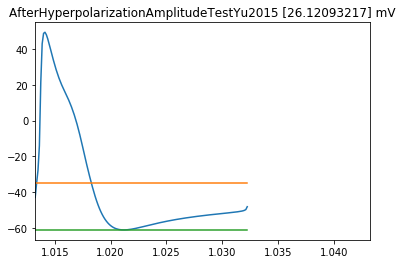

Code block 'AfterHyperpolarizationAmplitudeTestYu2015' took: 42584.2471123 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.AfterHyperpolarizationAmplitudeTestYu2015 object at 0x7fd7dd147550>, array([26.12093217]) * mV)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.AfterHyperpolarizationAmplitudeTestBurtonUrban2014 object at 0x7fd7dd046cd0>)


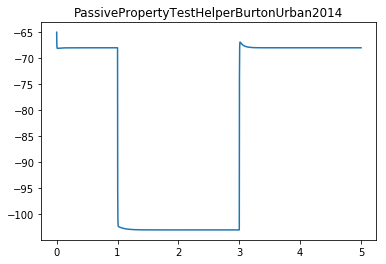

Code block 'PassivePropertyTestHelperBurtonUrban2014' took: 8865.41581154 ms


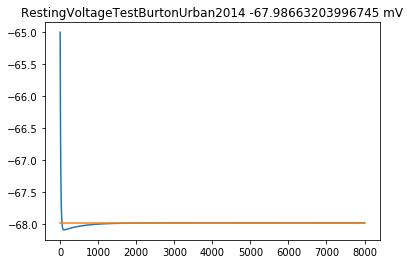

Code block 'RestingVoltageTestBurtonUrban2014' took: 9248.86989594 ms


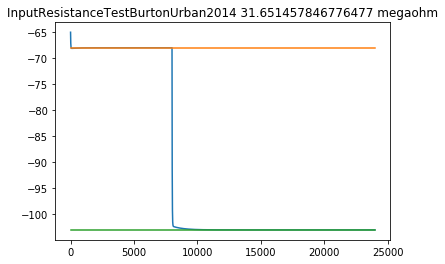

Code block 'InputResistanceTestBurtonUrban2014' took: 367.05493927 ms


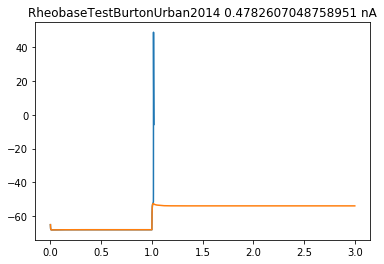

Code block 'RheobaseTestBurtonUrban2014' took: 35846.378088 ms


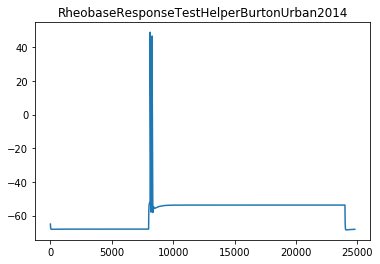

Code block 'RheobaseResponseTestHelperBurtonUrban2014' took: 40179.5990467 ms


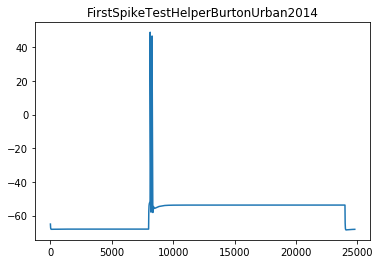

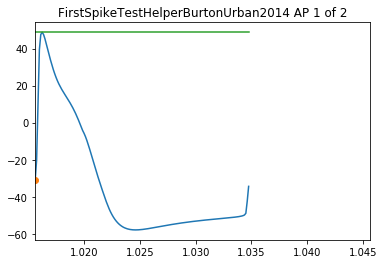

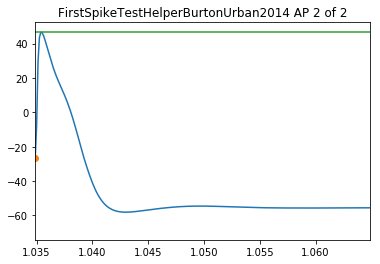

Code block 'FirstSpikeTestHelperBurtonUrban2014' took: 41180.4859638 ms


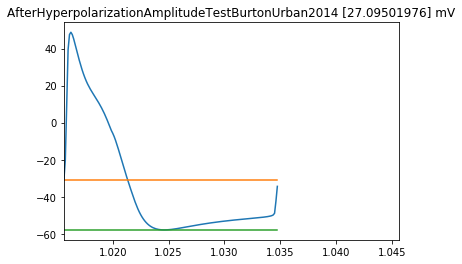

Code block 'AfterHyperpolarizationAmplitudeTestBurtonUrban2014' took: 41529.943943 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.AfterHyperpolarizationAmplitudeTestBurtonUrban2014 object at 0x7fd7dd046cd0>, array([27.09501976]) * mV)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.AfterHyperpolarizationTimeTestYu2015 object at 0x7fd7dd147d90>)


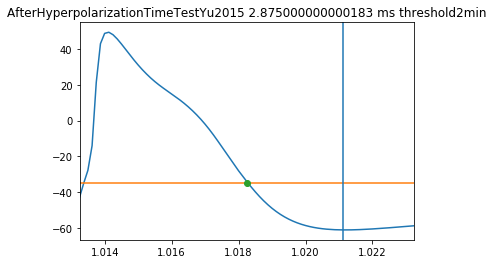

Code block 'AfterHyperpolarizationTimeTestYu2015' took: 335.66904068 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.AfterHyperpolarizationTimeTestYu2015 object at 0x7fd7dd147d90>, array(2.875) * ms)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.AfterHyperpolarizationTimeTestBurtonUrban2014 object at 0x7fd7dd046fd0>)


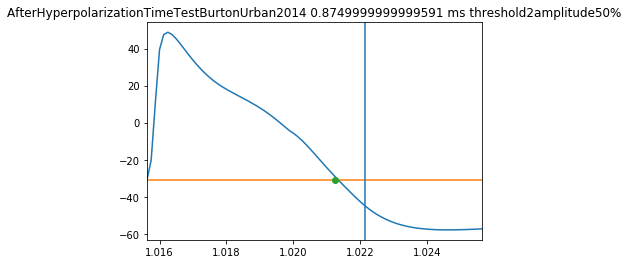

Code block 'AfterHyperpolarizationTimeTestBurtonUrban2014' took: 355.014801025 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.AfterHyperpolarizationTimeTestBurtonUrban2014 object at 0x7fd7dd046fd0>, array(0.875) * ms)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikeAmplitudeTestYu2015 object at 0x7fd7dd174390>)
Code block 'SpikeAmplitudeTestYu2015' took: 3.70693206787 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikeAmplitudeTestYu2015 object at 0x7fd7dd174390>, array([84.43772845]) * mV)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikeAmplitudeTestBurtonUrban2014 object at 0x7fd7dd174690>)
Code block 'SpikeAmplitudeTestBurtonUrban2014' took: 3.85403633118 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikeAmplitudeTestBurtonUrban2014 object at 0x7fd7dd1

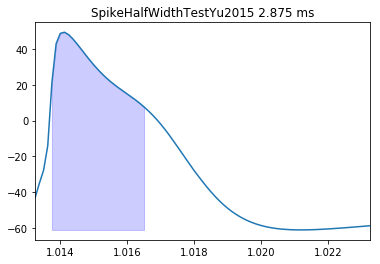

Code block 'SpikeHalfWidthTestYu2015' took: 332.410812378 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikeHalfWidthTestYu2015 object at 0x7fd7dd1749d0>, array(2.875) * ms)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikeHalfWidthTestBurtonUrban2014 object at 0x7fd7dd174c10>)


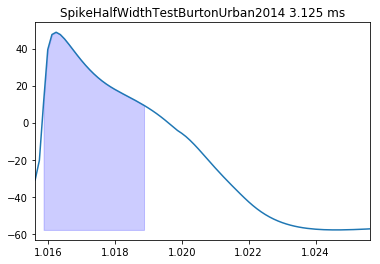

Code block 'SpikeHalfWidthTestBurtonUrban2014' took: 323.205947876 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikeHalfWidthTestBurtonUrban2014 object at 0x7fd7dd174c10>, array(3.125) * ms)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikePeakTestYu2015 object at 0x7fd8440a54d0>)
Code block 'SpikePeakTestYu2015' took: 5.56683540344 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikePeakTestYu2015 object at 0x7fd8440a54d0>, array(49.41322192) * mV)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikeThresholdTestYu2015 object at 0x7fd7dd174f10>)
Code block 'SpikeThresholdTestYu2015' took: 3.89194488525 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SpikeThresholdTestYu2015 object at 0x7fd7dd174f10>, array([-35.02450653]) * mV)
('Starting', {'model_class': u'p

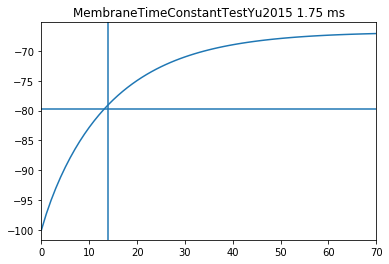

Code block 'MembraneTimeConstantTestYu2015' took: 347.100019455 ms
Code block 'CellCapacitanceTestYu2015' took: 357.522964478 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.CellCapacitanceTestYu2015 object at 0x7fd7dd174190>, array(55.24363891) * pF)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.CellCapacitanceTestBurtonUrban2014 object at 0x7fd7dd147a90>)


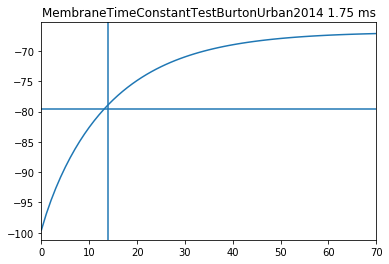

Code block 'MembraneTimeConstantTestBurtonUrban2014' took: 369.39907074 ms
Code block 'CellCapacitanceTestBurtonUrban2014' took: 380.013942719 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.CellCapacitanceTestBurtonUrban2014 object at 0x7fd7dd147a90>, array(55.28971236) * pF)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.FISlopeTestBurtonUrban2014 object at 0x7fd7dd1103d0>)


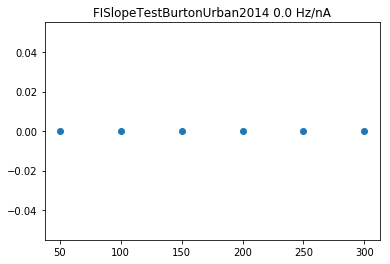

Code block 'FISlopeTestBurtonUrban2014' took: 22318.8591003 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.FISlopeTestBurtonUrban2014 object at 0x7fd7dd1103d0>, array(0.) * Hz/nA)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestYu2015 object at 0x7fd7dd1106d0>)
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestYu2015 object at 0x7fd7dd1106d0>, array(31.6778553) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestBurtonUrban2014 object at 0x7fd83c5f9250>)
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestBurtonUrban2014 object at 0x7fd83c5f9250>, array(31.65145785) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestAbraham2010 obje

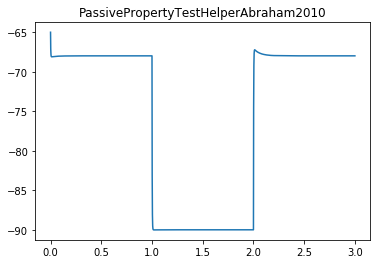

Code block 'PassivePropertyTestHelperAbraham2010' took: 4741.38307571 ms


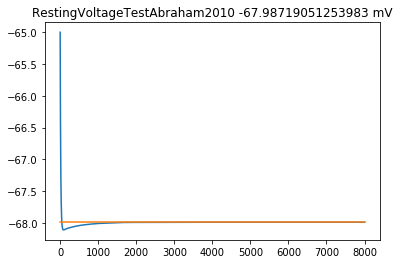

Code block 'RestingVoltageTestAbraham2010' took: 5141.05510712 ms


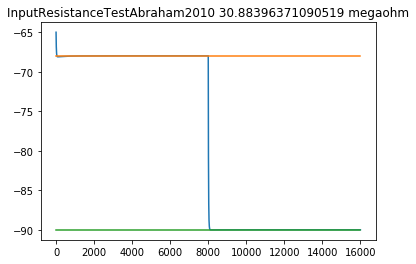

Code block 'InputResistanceTestAbraham2010' took: 5666.10002518 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestAbraham2010 object at 0x7fd7dd174d90>, array(30.88396371) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestHovis2010 object at 0x7fd7dd110410>)


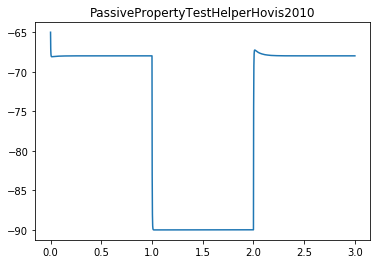

Code block 'PassivePropertyTestHelperHovis2010' took: 4778.05280685 ms


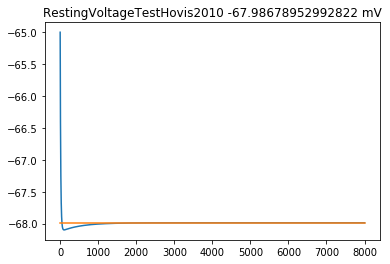

Code block 'RestingVoltageTestHovis2010' took: 5192.77620316 ms


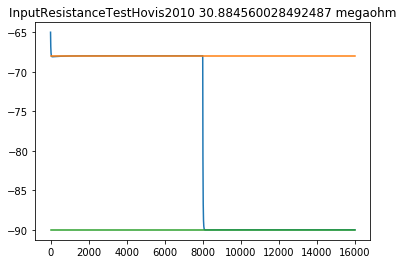

Code block 'InputResistanceTestHovis2010' took: 5579.75506783 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestHovis2010 object at 0x7fd7dd110410>, array(30.88456003) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestShpak2012 object at 0x7fd7dd110550>)


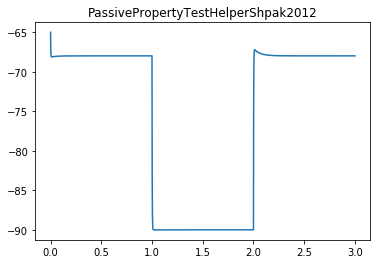

Code block 'PassivePropertyTestHelperShpak2012' took: 4623.94785881 ms


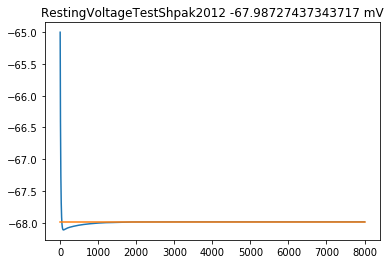

Code block 'RestingVoltageTestShpak2012' took: 5034.50083733 ms


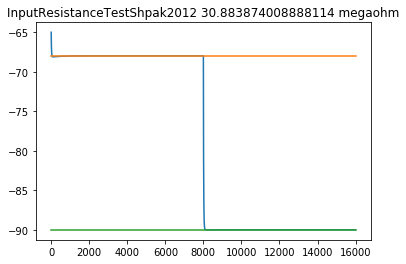

Code block 'InputResistanceTestShpak2012' took: 5426.96595192 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestShpak2012 object at 0x7fd7dd110550>, array(30.88387401) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestZibman2011 object at 0x7fd7dd110090>)


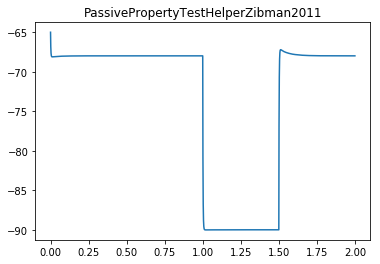

Code block 'PassivePropertyTestHelperZibman2011' took: 3781.3270092 ms


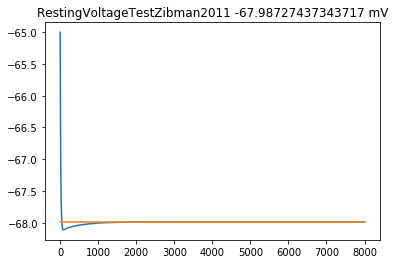

Code block 'RestingVoltageTestZibman2011' took: 4198.48108292 ms


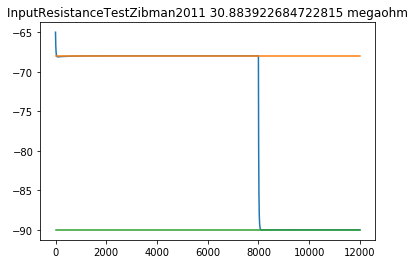

Code block 'InputResistanceTestZibman2011' took: 4580.60693741 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestZibman2011 object at 0x7fd7dd110090>, array(30.88392268) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestChristie2005 object at 0x7fd7dd110cd0>)


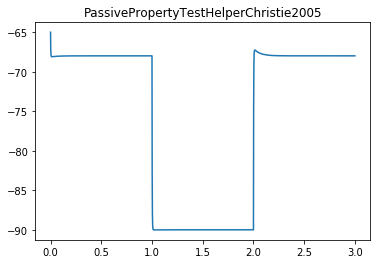

Code block 'PassivePropertyTestHelperChristie2005' took: 5096.13895416 ms


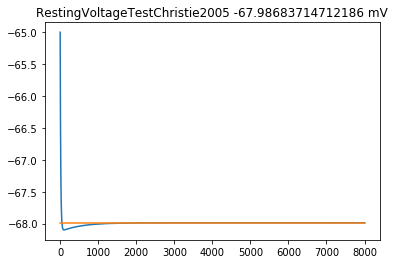

Code block 'RestingVoltageTestChristie2005' took: 5478.59191895 ms


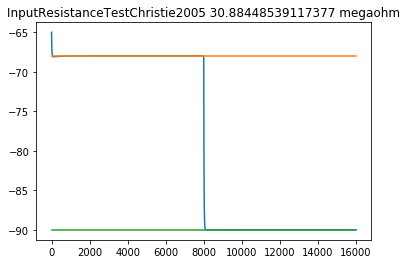

Code block 'InputResistanceTestChristie2005' took: 5853.14106941 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestChristie2005 object at 0x7fd7dd110cd0>, array(30.88448539) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestFukunaga2012 object at 0x7fd7dd12a090>)


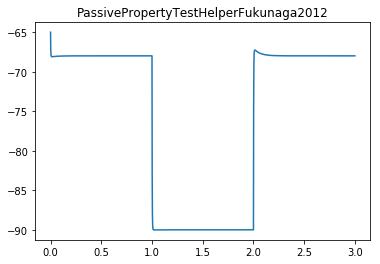

Code block 'PassivePropertyTestHelperFukunaga2012' took: 5266.16287231 ms


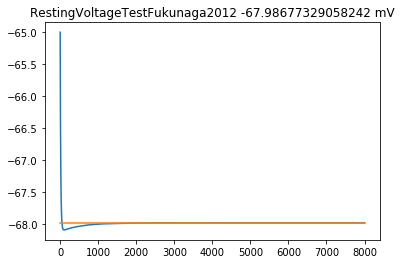

Code block 'RestingVoltageTestFukunaga2012' took: 5665.72499275 ms


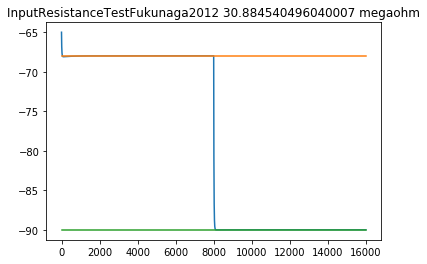

Code block 'InputResistanceTestFukunaga2012' took: 6048.13504219 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.InputResistanceTestFukunaga2012 object at 0x7fd7dd12a090>, array(30.8845405) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.ISICVTestYu2015 object at 0x7fd7dd110f50>)


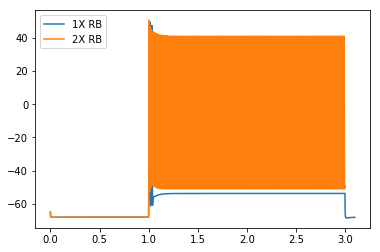

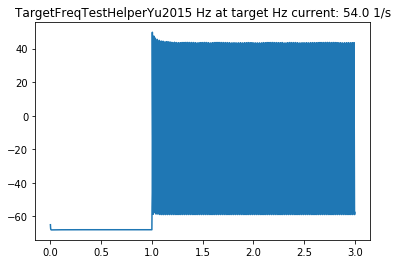

Code block 'TargetFreqTestHelperYu2015' took: 72483.9630127 ms


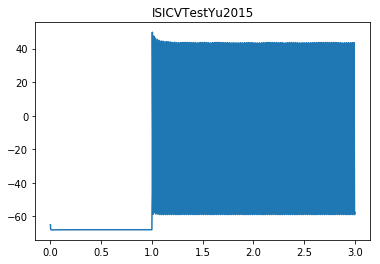

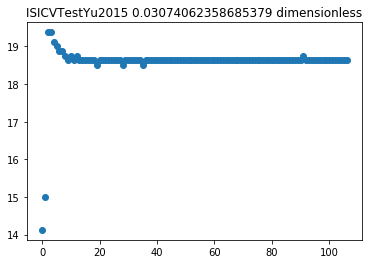

Code block 'ISICVTestYu2015' took: 73298.6078262 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.ISICVTestYu2015 object at 0x7fd7dd110f50>, array(0.03074062) * dimensionless)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.ISICVTestBurtonUrban2014 object at 0x7fd7dd110e90>)


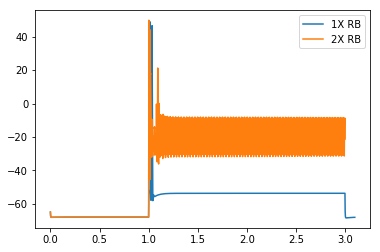

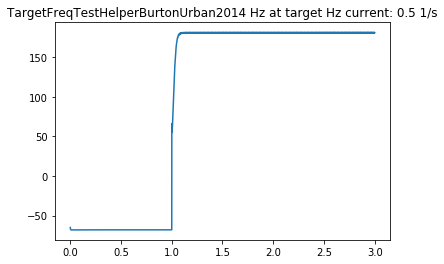

Code block 'TargetFreqTestHelperBurtonUrban2014' took: 123651.926041 ms
Code block 'ISICVTestBurtonUrban2014' took: 123665.476084 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.ISICVTestBurtonUrban2014 object at 0x7fd7dd110e90>, 0)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.ReboundSpikingTestBurtonUrban2014 object at 0x7fd7dd110950>)


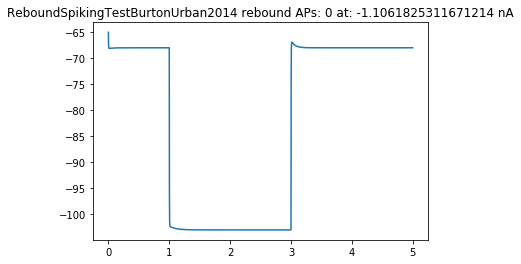

Code block 'ReboundSpikingTestBurtonUrban2014' took: 353.192090988 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.ReboundSpikingTestBurtonUrban2014 object at 0x7fd7dd110950>, False)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.ReboundSpikingTestJohnsonDelaney2010 object at 0x7fd7dd174f50>)


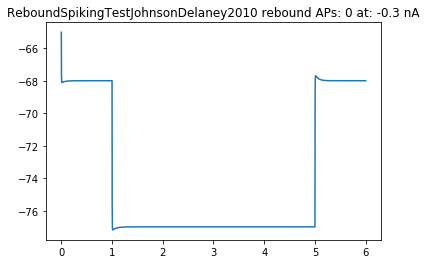

Code block 'ReboundSpikingTestJohnsonDelaney2010' took: 6030.09200096 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.ReboundSpikingTestJohnsonDelaney2010 object at 0x7fd7dd174f50>, False)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.RestingVoltageTestYu2015 object at 0x7fd7dd12a510>)
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.RestingVoltageTestYu2015 object at 0x7fd7dd12a510>, array(-67.98678953) * mV)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.RestingVoltageTestBurtonUrban2014 object at 0x7fd7dd12a5d0>)
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.RestingVoltageTestBurtonUrban2014 object at 0x7fd7dd12a5d0>, array(-67.98663204) * mV)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.RestingVoltageTestAbraham2010 object a

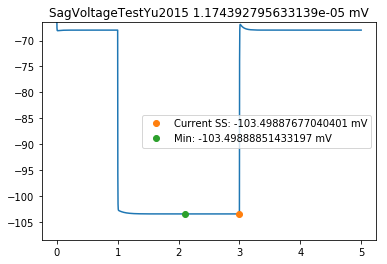

Code block 'SagVoltageTestYu2015' took: 488.953113556 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SagVoltageTestYu2015 object at 0x7fd7dd12ac10>, array(1.1743928e-05) * mV)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SagVoltageTestBurtonUrban2014 object at 0x7fd7dd12a910>)


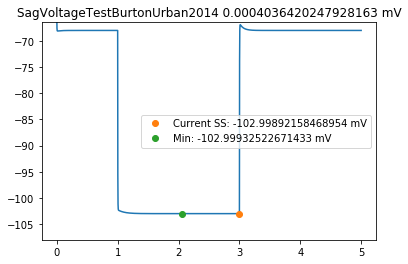

Code block 'SagVoltageTestBurtonUrban2014' took: 508.034944534 ms
('Finished', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SagVoltageTestBurtonUrban2014 object at 0x7fd7dd12a910>, array(0.00040364) * mV)
('Starting', {'model_class': u'prev_ob_models.Oconnor2012.isolated_cells.MC1'}, <__main__.SagVoltageTestAngelo2012 object at 0x7fd7dd12a550>)


In [ ]:
cache.clear()
i = 14 #Max: 14, skipped 8-11
for item in [work_items[i]]:
    dowork(item)

print("FINISHED")

In [ ]:
raise Exception()

In [ ]:
# Run the tests
processes = 15   
from multiprocessing import Pool
pool = Pool(processes = processes, maxtasksperchild=1)
result = pool.map(dowork, work_items)
pool.terminate()
pool.join()
result

# Show result in a table
df = []
for model in result:
    row = {"model": model[0]}
    for t, test in enumerate(tests):
        row[test.__class__.__name__] = model[1][t]
    df.append(row)
        
df = DataFrame(df)
df


In [ ]:
df

In [ ]:
raise Exception()

In [ ]:
#cache.clear()
import prev_ob_models
cell = prev_ob_models.Oconnor2012.isolated_cells.MC1()
model = NeuronCellModel(cell.soma(0.5),name=cell.__class__.__module__+'.'+cell.__class__.__name__)
FISlopeTestBurtonUrban2014().generate_prediction(model)

In [ ]:
model = None
cell = None
raise Exception()

In [ ]:
for i, test in enumerate(tests):
    #print(i, 'judging', test)
    print(test.generate_prediction(model))
    

In [ ]:
test.observation

In [ ]:
with CodeTimer():
    TestSuite(tests).judge(model)

In [ ]:
from neuronunit.tests.olfactory_bulb.utilities import cache
#cache.clear()

In [ ]:

class Test(BurtonUrban2015, SpikeThresholdTest):
    pass

test = Test().generate_prediction(model)

In [ ]:
test

In [ ]:
#rb = RheobaseTestBurtonUrban2014().generate_prediction(model)
rb = 0.02438785 * pq.nA

In [ ]:
SpikeAccommodationTimeConstantTestZibman2011(rb).generate_prediction(model)

In [ ]:
SpikeAccommodationTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
ISICVTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
rb = RheobaseTestYu2015().generate_prediction(model)

In [ ]:
ISICVTestYu2015(rb).generate_prediction(model)

In [ ]:
0/0

In [ ]:
ReboundSpikingTestBurtonUrban2014().generate_prediction(model)

In [ ]:
ReboundSpikingTestJohnsonDelaney2010().generate_prediction(model)

In [ ]:
rb = RheobaseTestBurtonUrban2014().generate_prediction(model)
rb

In [ ]:
voltage = model.inject_square_current({"delay": 1000*pq.ms,"duration": 2000*pq.ms, "amplitude": rb})

In [ ]:
plt.plot(voltage)

In [ ]:
voltage.magnitude[np.where(voltage.times > 1000*pq.ms)]

In [ ]:
rb = 0.02438782 * pq.nA

In [ ]:
# %matplotlib notebook
# %matplotlib notebook
# %matplotlib notebook
# %matplotlib notebook

In [ ]:
rb = RheobaseTestYu2015().generate_prediction(model)
rb

In [ ]:
SagVoltageTestAngelo2012().generate_prediction(model)
SagVoltageTestBurtonUrban2014().generate_prediction(model)
SagVoltageTestYu2015().generate_prediction(model)
SagVoltageTestHu2016().generate_prediction(model)

In [ ]:
AfterHyperpolarizationAmplitudeTestYu2015(rb).generate_prediction(model)

In [ ]:
AfterHyperpolarizationTimeTestYu2015(rb).generate_prediction(model)

In [ ]:
AfterHyperpolarizationAmplitudeTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
AfterHyperpolarizationTimeTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
1/0

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

v = aps[0]
plt.plot(v["voltage"])
#plt.plot(v3_z[0:get_zero_crossings(v3_z)[0]+1])
#plt.xlim((0,80))
plt.show()

In [ ]:
test1 = SagVoltageTestAngelo2012(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})
test2 = SagVoltageTestBurtonUrban2014(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})
test3 = SagVoltageTestYu2015(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})
test4 = SagVoltageTestHu2016(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})

#suite = test1 
suite = TestSuite(tests=[test1,test2,test3,test4])

In [ ]:
suite.judge(model)